<a href="https://colab.research.google.com/github/andref03/Rankeamento-feito-por-PCA-Principal-Component-Analysis/blob/main/rankeamento_distritos_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ranking de Distritos com PCA - Análise de Componentes Principais**

---
> Verificar README.md

## **Importanto o conjunto de dados**

In [178]:
import pandas as pd

In [179]:
distritos_sp = pd.read_csv('/content/distritos_sp.csv') # caminho do arquivo .cvs

In [180]:
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


In [181]:
distritos_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


## **Matriz de  Correlação**


In [182]:
# remove as variáveis categóricas, para tratar os dados com PCA usando apenas variáveis numéricas
variaveis_numericas = distritos_sp.drop(['cod_ibge', 'distritos'], axis = 1)
# cria a matriz de correlação
variaveis_numericas.corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


### Interpretação

Quanto mais perto dos valores 1 e -1, maior é a correlação entre tais variáveis.

Porém, quanto mais perto de 0 (zero), menor é a correlação.

## **Critérios de Adequação: estatística KMO e esfericidade de Bartlett**

> No momento de avaliar se os dados são adequados ou não para utilizar a técnica PCA, é necessário checar se a correlação entre os dados é baixa, uma vez que se isso acontecer os fatores gerados não irão agrupar de forma satisfatória o comportamento das variáveis. Para isso, podemos utilizar dois critérios: a estatística KMO e o teste de esfericidade de Bartlett.

### **Calculando Estatística KMO**

> O critério ou teste de Kaiser-Meyer-Olkin (KMO) é um critério para identificar se um modelo de análise fatorial que está sendo utilizado é adequadamente ajustado aos dados, testando a consistência geral dos dados.

> Resulta em um índice, sendo uma estatística que indica a proporção da variância dos dados que pode ser considerada comum a todas as variáveis, ou seja, que pode ser atribuída a um fator comum.

> Essa estatística varia de 0 a 1, e, enquanto **valores mais próximos de 1 (ideal)** indicam que as variáveis compartilham um *percentual de variância bastante elevado* (correlações de Pearson altas), **valores mais próximos de 0 são decorrentes de correlações de Pearson baixas** entre as variáveis, o que pode indicar que a análise fatorial *será inadequada*.

> Caso o valor do **KMO** seja **superior a 0.5**, já podemos considerá-lo bom e/ou **minimamente adequado** para trabalharmos com o PCA.

---
> **Tabela de valores KMO:**

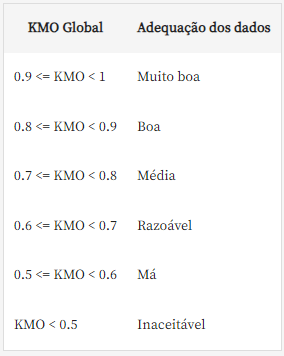

In [183]:
# instalando biblioteca p/ permitir manipulação dos dados com PCA e seus fatores
!pip install factor_analyzer

In [184]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [185]:
kmo_variaveis, kmo = calculate_kmo(variaveis_numericas)

In [186]:
kmo_variaveis # visualização do kmo p/ todas as variáveis

array([0.77821831, 0.81941916, 0.8560973 , 0.81750459, 0.94677797,
       0.84146713, 0.89083164, 0.78871213, 0.63275248])

In [187]:
kmo # visualização do kmo global

0.833091424182929

### **Realizando o teste de "Esfericidade de Bartlett"**

> O teste de esfericidade de Bartlett consiste em comparar a matriz de correlações (**p**) com uma matriz identidade (**I**) de mesma dimensão.

> Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatisticamente diferentes de 0, a determinado nivel de significância, poderemos considerar que a extração dos fatores não será adequada.

---
> **Imagem explicativa**

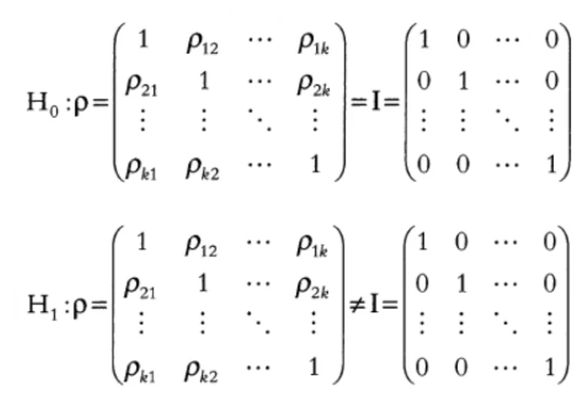

---
> **Obs.:** Deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão.

In [188]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [189]:
qui_quadrado, p_valor = calculate_bartlett_sphericity(variaveis_numericas)

In [190]:
print(f'Qui-Quadrado: {qui_quadrado}')
print(f'P-Valor:      {p_valor}')

Qui-Quadrado: 748.1593126421544
P-Valor:      5.607017481839493e-134


In [191]:
p_valor < 0.05

True

#### Importante

> **Obs.:** Como o valor do **p_valor** é **menor** do que o nível de **significância de 5%**, podemos rejeitar a hipótese nule de que a matriz de correlação (**p**) é igual à matriz identidade (**I**).

## **Aplicação do PCA nos dados**

---
#### Importante

1. Como os dados não estão tratados, devemos padronizá-los. Ou seja, devemos colocar os dados em uma mesma escala. Fazemos isso com o *z-score*.

2. O procedimento de análise fatorial consiste primeiramente em obter autovalores e autovetores da matriz de correlação dos dados.

  Logo após isso, o autovetor será dividido pela raiz quadrada do respectivo autovalor, gerando assim os scores fatoriais para cada variável e em cada um dos fatores.
  
  Os scores fatoriais são então multiplicados pelas variáveis padronizadas e soma-se os resultados para cada um dos fatores, gerando assim os componentes do PCA.

In [192]:
variaveis_numericas

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...
91,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
# armazena o nome das colunas, p/ permitir que os dados sejam padronizados posteriormente
colunas_numericas = variaveis_numericas.columns
colunas_numericas

Index(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc',
       'causasext', 'favel', 'denspop'],
      dtype='object')

In [195]:
padronizacao = StandardScaler()
# ajusta/padroniza os dados com o fit_transform()
variaveis_numericas = padronizacao.fit_transform(variaveis_numericas)
# agora as variáveis numéricas estão em formato de array
variaveis_numericas

array([[ 1.08502328e-01,  1.80715140e-01,  5.23096244e-01,
         1.05541274e+00, -4.29281808e-01, -5.38805723e-01,
        -7.80681293e-01, -7.56406323e-01,  5.21804668e-01],
       [ 2.40630528e+00,  1.98438577e+00,  1.32019516e+00,
         1.28464265e+00, -1.47188596e+00, -7.33574170e-01,
        -1.40197826e+00, -6.68425227e-01, -8.57183702e-01],
       [-7.90322801e-01, -1.13342509e+00, -1.27037668e+00,
        -1.00765651e+00, -1.27369371e-01,  5.17822174e+00,
        -2.08708641e+00, -7.56406323e-01, -1.84993379e+00],
       [-5.64581006e-01, -4.12654904e-01, -2.74002674e-01,
        -9.07368417e-02,  4.90544879e-01, -3.18259087e-01,
         2.21327218e-01, -7.04087705e-02,  7.83822446e-01],
       [-6.29818314e-01, -6.35605024e-01, -7.47280632e-02,
        -9.07368417e-02,  7.52202169e-01, -4.12779054e-01,
        -1.65420498e-01, -2.32344990e-01,  1.36865133e+00],
       [ 5.20636431e-01,  1.67189899e-01,  9.21645940e-01,
         8.26182822e-01, -1.48396254e+00, -6.247330

In [196]:
# formata os dados (já ajustados/padronizados) com o nome original das colunas, melhorando a visualização
dados_padronizados = pd.DataFrame(variaveis_numericas, columns = colunas_numericas)
dados_padronizados

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


In [197]:
from sklearn.decomposition import PCA

In [198]:
# extrai a qtdd de fatores (variáveis) dos dados
n_fatores = dados_padronizados.shape[1]
n_fatores

9

In [199]:
# faz o ajustamento dos dados padronizados em fatores
pca = PCA(n_components = n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=9)

In [200]:
# retorna a porcentagem da variância explicada  p/ cada fator do PCA, em forma de array
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

## **Variância explicada**

In [201]:
import plotly.express as px
import numpy as np

In [202]:
# nomeia os fatores
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [203]:
# visualizando as porcentagens de cada fator

fig = px.bar(x = fatores, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2), title = "Scree Plot")

fig.update_layout(yaxis = {'title': 'Porcentagem de Variância Explicada', 'tickfont': {'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}}
                  )

fig.show()

In [204]:
# a variância acumulada tem nome intuitivo, representando a soma dos fatores (F1, F1+F2, F1+F2+F3, etc.) em um array
variancia_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[0.5506700772160417,
 0.6800409820794437,
 0.7907469955852218,
 0.8711988432249139,
 0.930010202543966,
 0.9742684414070404,
 0.9886760753033328,
 0.9959056848263386,
 1.0]

In [205]:
# visualizando o somatório das porcentagens de fatores (F1, F1+F2, F1+F2+F3, etc.)

fig = px.bar(x = fatores, y = variancia_acumulada, text = np.around(variancia_acumulada, decimals = 2), title = "Scree Plot")

fig.update_layout(yaxis = {'title': 'Porcentagem de Variância Explicada', 'tickfont': {'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}}
                  )

fig.show()

## **Autovalores**

In [206]:
# irá retornar o seguinte array: [F1 explica esta qtdd de variáveis, F2 explica esta qtdd de variáveis, ...]
pca.explained_variance_

array([5.00819944, 1.17659433, 1.00684206, 0.73168838, 0.53487384,
       0.40251704, 0.13103364, 0.0657514 , 0.03723672])

In [207]:
# retorna o mesmo array acima, com pequenas diferenças
pca.explained_variance_ratio_ * n_fatores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [208]:
# descobre qual explicação é mais precisa: será aquela que mais se aproximas à qtdd de variáveis (ou n_fatores)
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

9.094736842105265
9.0


In [209]:
autovalores = pca.explained_variance_ratio_ * n_fatores

### Importante

> O critério de escolha da quantidade de fatores, em que são levados em consideração apenas os fatores correspondentes a autovalores maiores que 1, é comumente utilizado e conhecido por critério da **raiz latente** ou **critério de Kaiser**.

> Nesse caso vamos selecionar os dois primeiros fatores, que possuem autovalores maiores que 1.

In [210]:
fatores_selecionados = ['Fator selecionado' if autovalor > 1 else 'Fator não selecionado' for autovalor in autovalores]
fatores_selecionados

['Fator selecionado',
 'Fator selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado']

In [211]:
figura = px.bar(x = range(1, 10), y = autovalores, text = np.around(autovalores, decimals = 2),
                title = 'Scree Plot', color = fatores_selecionados)

figura.update_layout(yaxis = {'title': 'Qutdd de variáveis explicadas', 'tickfont': {'size':15}},
                  xaxis = {'title': 'Autovalor', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}}
                  )

figura.show()

In [212]:
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': variancia_acumulada})
resumo

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,4.956031,0.550670,0.550670
1,F2,1.164338,0.129371,0.680041
2,F3,0.996354,0.110706,0.790747
3,F4,0.724067,0.080452,0.871199
4,F5,0.529302,0.058811,0.930010
5,F6,0.398324,0.044258,0.974268
6,F7,0.129669,0.014408,0.988676
7,F8,0.065066,0.007230,0.995906
8,F9,0.036849,0.004094,1.000000


In [213]:
# retorna um array com os autovetores (de cada fator)
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [214]:
# melhorando a visualização do array acima
pd.DataFrame(pca.components_, columns = colunas_numericas, index = [f'Autovetor {i+1}' for i in range(n_fatores)])

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
Autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
Autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
Autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
Autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
Autovetor 7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
Autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
Autovetor 9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


In [215]:
# p/ obter as cargas fatoriais, precisamos tirar as raízes dos autovalores
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [216]:
# as cargas fatoriais indicam o quanto cada variável original contribui para a formação de cada fator (varia de 1 a -1)
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns = fatores, index = colunas_numericas)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


In [217]:
# escolhendo abaixo apenas os fatores que foram selecionados anteriormente pelo "Critério de Kaiser"
resumo_cargas_fatoriais = cargas_fatoriais[['F1','F2']].copy()
resumo_cargas_fatoriais

,F1,F2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


In [218]:
picture = px.scatter(cargas_fatoriais, x = 'F1', y = 'F2', text = cargas_fatoriais.index)
picture.update_traces(textposition = 'top center')
picture.show()

### Importante: Verificando as comunalidades de cada uma das variáveis

> As comunalidades representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

> Comunalidade: representa a porcentagem de informação que é explicada de cada uma das variáveis.

In [219]:
resumo_cargas_fatoriais['Comunalidade'] = (resumo_cargas_fatoriais ** 2).sum(axis = 1)
resumo_cargas_fatoriais

,F1,F2,Comunalidade
renda,0.832127,0.368971,0.828575
quota,0.900606,0.226453,0.862372
escolaridade,0.966543,-0.024594,0.934811
idade,0.960135,-0.065447,0.926143
mortalidade,-0.655699,-0.176634,0.461141
txcresc,-0.696781,0.337446,0.599374
causasext,-0.666578,-0.043910,0.446254
favel,-0.457185,0.442840,0.405126
denspop,0.166281,-0.793048,0.656574


## **Obtendo os Fatores Principais**

In [220]:
pd.DataFrame(pca.transform(dados_padronizados), columns = fatores)

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1.519105,-0.761299,0.440370,0.256326,-0.134060,-0.202264,-0.177369,0.025619,-0.350088
1,3.985600,1.555514,0.313021,0.070926,0.100206,0.332763,0.655952,-0.105873,-0.055641
2,-2.681205,2.356295,3.872196,3.061874,1.039798,0.920633,-0.793794,0.194619,-0.111070
3,-0.574202,-1.061710,-0.214948,-0.121274,0.105649,-0.204103,-0.011002,0.042348,-0.100050
4,-0.457007,-1.688282,-0.110352,0.089602,0.452111,-0.437592,-0.037891,-0.168406,-0.013653
...,...,...,...,...,...,...,...,...,...
91,-0.222504,-1.876371,-0.553807,0.480278,-0.054540,0.281924,0.172851,-0.051022,-0.148682
92,0.651970,-0.175635,-0.277139,-0.095741,-0.422490,-0.538550,-0.068902,0.134096,-0.299739
93,0.452520,1.141560,-1.023709,-0.413869,0.530598,-0.225303,0.175189,-0.413634,0.079473
94,-0.262248,0.698634,0.148829,0.407752,-0.198409,-0.272673,0.300921,-0.243063,-0.066496


In [221]:
pca2 = PCA(n_components = 2)
pd.DataFrame(pca2.fit_transform(dados_padronizados), columns = ['F1','F2'])

,F1,F2
0,1.519105,-0.761299
1,3.985600,1.555514
2,-2.681205,2.356295
3,-0.574202,-1.061710
4,-0.457007,-1.688282
...,...,...
91,-0.222504,-1.876371
92,0.651970,-0.175635
93,0.452520,1.141560
94,-0.262248,0.698634


### Mostrando como o sklearn obtém os autovetores


In [222]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [223]:
pca.feature_names_in_

array(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade',
       'txcresc', 'causasext', 'favel', 'denspop'], dtype=object)

In [224]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_ ):
  F1 += pca.components_[0][indice] * dados_padronizados[variavel]

In [225]:
F1

0     1.519105
1     3.985600
2    -2.681205
3    -0.574202
4    -0.457007
        ...   
91   -0.222504
92    0.651970
93    0.452520
94   -0.262248
95   -2.870093
Name: renda, Length: 96, dtype: float64

### Precisamos do **score fatorial**, e não dos autovetores! Faremos isso abaixo.

> Para isso, precisaremos dividir os autovetores pela raiz quadrada dos autovalores correspondentes.

In [226]:
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [227]:
# obtendo os scores fatoriais
scores_fatoriais = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
  scores_fatoriais[i] = pca.components_[i]/raiz_autovalores[i]

In [228]:
scores_fatoriais # visualização

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [ 0.99228938,  0.4104418 , -1.47585803, -1.48603139, -0.2451938 ,
        -1.17470224, -0.6019508 , -0.60828084, -0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

### Pelo critério da raiz latente ou **critério de Kaiser**, vamos obter apenas os dois primeiros fatores (que foram selecionados)

In [229]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_ ):
  F1 += scores_fatoriais[0][indice] * dados_padronizados[variavel]

In [230]:
F1 # resultados do 1º fator

0     0.682371
1     1.790304
2    -1.204379
3    -0.257928
4    -0.205284
        ...   
91   -0.099947
92    0.292861
93    0.203269
94   -0.117800
95   -1.289226
Name: renda, Length: 96, dtype: float64

In [231]:
F2 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_ ):
  F2 += scores_fatoriais[1][indice] * dados_padronizados[variavel]

In [232]:
F2 # resultados do 2º fator

0    -0.705531
1     1.441565
2     2.183685
3    -0.983935
4    -1.564607
        ...   
91   -1.738918
92   -0.162769
93    1.057936
94    0.647456
95   -0.995189
Name: renda, Length: 96, dtype: float64

In [233]:
dados_fatoriais = distritos_sp[['cod_ibge', 'distritos']].copy()
dados_fatoriais['F1'] = F1
dados_fatoriais['F2'] = F2
dados_fatoriais

,cod_ibge,distritos,F1,F2
0,1,Água Rasa,0.682371,-0.705531
1,12,Alto de Pinheiros,1.790304,1.441565
2,23,Anhanguera,-1.204379,2.183685
3,34,Aricanduva,-0.257928,-0.983935
4,45,Artur Alvim,-0.205284,-1.564607
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918
92,93,Vila Prudente,0.292861,-0.162769
93,94,Vila Sônia,0.203269,1.057936
94,95,São Domingos,-0.117800,0.647456


In [234]:
# nesta célula, o tratamento do PCA já pode ser considerado como encerrado, ao adicionar os fatores F1 e F2 ao database principal
distritos_sp['F1'] = F1
distritos_sp['F2'] = F2

## **Obtendo o Ranking**

---
> Para obter os rankings, precisamos somar os fatores ponderados pelo percentual de variância explicada de cada um deles.

In [235]:
# analisa a influência de cada uma das variáveis nos fatores selecionados pelo critério de Kaiser
pict = px.scatter(cargas_fatoriais, x = 'F1', y = 'F2', text = cargas_fatoriais.index)
pict.update_traces(textposition = 'top center')
pict.show()

In [236]:
# obtém o ranking dos distritos
dados_fatoriais['Rankings'] = (dados_fatoriais['F1'] * pca.explained_variance_ratio_[0]) + (dados_fatoriais['F2'] * pca.explained_variance_ratio_[1])
dados_fatoriais

,cod_ibge,distritos,F1,F2,Rankings
0,1,Água Rasa,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
2,23,Anhanguera,-1.204379,2.183685,-0.380710
3,34,Aricanduva,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,0.292861,-0.162769,0.140212
93,94,Vila Sônia,0.203269,1.057936,0.248800
94,95,São Domingos,-0.117800,0.647456,0.018893


In [237]:
# ordena o ranking do maior para o menor valor da coluna 'Rankings'
dados_fatoriais.sort_values('Rankings', ascending = False)

,cod_ibge,distritos,F1,F2,Rankings
44,40,Jardim Paulista,2.466536,0.493433,1.422083
31,26,Moema,1.968233,1.369083,1.260966
70,69,Santo Amaro,1.897554,1.459515,1.233745
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
53,50,Morumbi,1.166425,3.021258,1.033178
...,...,...,...,...,...
42,38,Jardim Ângela,-1.684687,0.777432,-0.827130
95,96,Lajeado,-1.289226,-0.995189,-0.838686
10,3,Brasilândia,-1.531760,-0.046604,-0.849523
24,18,Cidade Tiradentes,-1.690649,-0.235010,-0.961393


In [238]:
# acrescescenta a coluna de 'Rankings' ao banco de dados principal
distritos_sp['Rankings'] = dados_fatoriais['Rankings']

In [239]:
distritos_sp # visualização

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565,1.172363
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685,-0.380710
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.203269,1.057936,0.248800
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893


## **Visualizando o ranking em mapa com Geopandas**

In [240]:
!pip install geopandas

In [241]:
import geopandas as gpd

In [242]:
dados_mapa = gpd.read_file('/content/SIRGAS_SHP_distrito_polygon.shp') # caminho p/ o arquivo
dados_mapa

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


In [243]:
# definindo o sistema de coordenadas
dados_mapa.set_crs(epsg = 31983, inplace = True)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


<Axes: >

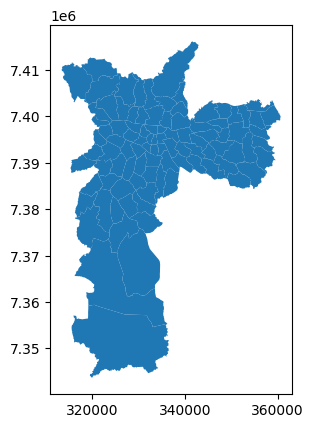

In [244]:
# visualiza o contorno do mapa
dados_mapa.plot()